In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(
    optimizer='sgd',
    loss='mean_squared_error',
    metrics=[keras.metrics.MeanAbsoluteError()]
)

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

print(xs.shape, ys.shape)

r = model.fit(xs, ys, epochs=500, verbose=0)

model.predict([10.0])



(6,) (6,)

1/1 [==============================] - 0s 126ms/step


array([[18.977962]], dtype=float32)

In [4]:
model.evaluate(xs, ys)

1/1 [==============================] - 0s 176ms/step - loss: 5.5874e-05 - mean_absolute_error: 0.0061


[5.587417399510741e-05, 0.006068875547498465]

In [5]:
r.history.keys()

dict_keys(['loss', 'mean_absolute_error'])

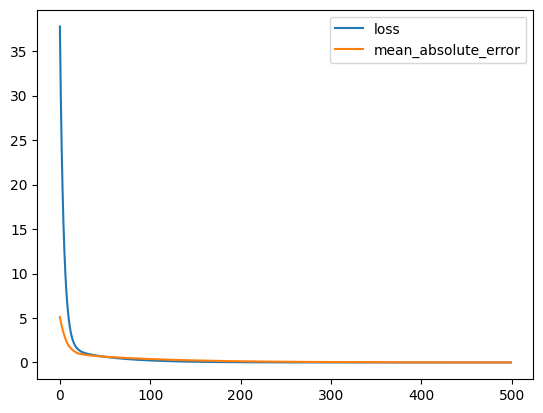

In [6]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['mean_absolute_error'], label='mean_absolute_error')
plt.legend()

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Sorteados.csv', delimiter=';')

In [ ]:
df.head(5)

,row ID,Bola_1,Bola_2,Bola_3,Bola_4,Bola_5,Bola_6,Bola_7,Bola_8,Bola_9,Bola_10,Bola_11,Bola_12,Bola_13,Bola_14,Bola_15,soma,dens_geral,dens_mediana,dens_med_aux,dens_geral_cat,b1_b2_b3_sum,b4,b5_b6_b7_sum,b8,b9_b10_b11_sum,b12,b13_b14_b15_sum,qtde_variacao_soma,Data do Sorteio
0,2003-09-29,2,3,5,6,9,10,11,13,14,16,18,20,23,24,25,199,23,13,13.0,Dens_23_Medio,10,6,30,13,48,20,72,0,2003-09-29
1,2003-10-06,1,4,5,6,7,9,11,12,13,15,16,19,20,23,24,185,23,12,12.0,Dens_23_Medio,11,6,27,12,44,19,67,-14,2003-10-06
2,2003-10-13,1,4,6,7,8,9,10,11,12,14,16,17,20,23,24,182,23,11,11.0,Dens_23_Medio,12,7,27,11,42,17,67,-3,2003-10-13
3,2003-10-20,1,2,4,5,8,10,12,13,16,17,18,19,23,24,25,197,24,13,14.0,Dens_24_Maior,8,5,30,13,51,19,72,15,2003-10-20
4,2003-10-27,1,2,4,8,9,11,12,13,15,16,19,20,23,24,25,202,24,13,13.0,Dens_24_Maior,8,8,32,13,50,20,72,5,2003-10-27


In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
df.drop(to_drop, axis=1, inplace=True)

<ipython-input-50-15ad142eda4c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


In [ ]:
df2=df.corr()
(df2)

<ipython-input-55-f2836c5d0230>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2=df.corr()


,Bola_1,Bola_2,Bola_3,Bola_4,Bola_5,Bola_6,Bola_7,Bola_8,Bola_9,Bola_10,Bola_11,Bola_12,Bola_13,Bola_14,Bola_15,soma,dens_geral,b13_b14_b15_sum,qtde_variacao_soma
Bola_1,1.000000,0.683006,0.531796,0.430048,0.374598,0.326776,0.282638,0.265051,0.236386,0.196651,0.178565,0.150899,0.103492,0.074402,0.070284,0.419673,-0.679932,0.095576,0.292663
Bola_2,0.683006,1.000000,0.790454,0.658641,0.569129,0.490674,0.432148,0.388611,0.345840,0.295012,0.259152,0.210532,0.149913,0.109185,0.091008,0.581185,-0.432786,0.135900,0.411543
Bola_3,0.531796,0.790454,1.000000,0.832408,0.705349,0.607779,0.536596,0.476884,0.417884,0.353583,0.313446,0.257785,0.189130,0.145496,0.109247,0.670763,-0.308754,0.172860,0.479594
Bola_4,0.430048,0.658641,0.832408,1.000000,0.852409,0.736968,0.651538,0.574825,0.502814,0.431099,0.376906,0.307104,0.241795,0.183713,0.147540,0.746738,-0.206166,0.222358,0.523581
Bola_5,0.374598,0.569129,0.705349,0.852409,1.000000,0.872167,0.768712,0.675959,0.594908,0.517321,0.445842,0.367005,0.292267,0.213804,0.162075,0.803652,-0.154915,0.260918,0.567351
Bola_6,0.326776,0.490674,0.607779,0.736968,0.872167,1.000000,0.884675,0.775026,0.683744,0.604984,0.528319,0.446640,0.352899,0.267701,0.187457,0.844178,-0.101270,0.316384,0.601804
Bola_7,0.282638,0.432148,0.536596,0.651538,0.768712,0.884675,1.000000,0.879060,0.777325,0.681182,0.590945,0.509067,0.405157,0.311468,0.205551,0.862812,-0.055678,0.362067,0.622268
Bola_8,0.265051,0.388611,0.476884,0.574825,0.675959,0.775026,0.879060,1.000000,0.883369,0.765112,0.659354,0.567132,0.450613,0.359384,0.237451,0.866837,-0.019362,0.410245,0.621159
Bola_9,0.236386,0.345840,0.417884,0.502814,0.594908,0.683744,0.777325,0.883369,1.000000,0.871076,0.751768,0.639524,0.512133,0.398392,0.266846,0.858082,0.023217,0.461492,0.612147
Bola_10,0.196651,0.295012,0.353583,0.431099,0.517321,0.604984,0.681182,0.765112,0.871076,1.000000,0.858110,0.724719,0.590183,0.461976,0.315403,0.832175,0.087981,0.535193,0.589640


In [ ]:
df.columns

Index(['row ID', 'Bola_1', 'Bola_2', 'Bola_3', 'Bola_4', 'Bola_5', 'Bola_6',
       'Bola_7', 'Bola_8', 'Bola_9', 'Bola_10', 'Bola_11', 'Bola_12',
       'Bola_13', 'Bola_14', 'Bola_15', 'soma', 'dens_geral', 'dens_mediana',
       'dens_med_aux', 'dens_geral_cat', 'b1_b2_b3_sum', 'b4', 'b5_b6_b7_sum',
       'b8', 'b9_b10_b11_sum', 'b12', 'b13_b14_b15_sum', 'qtde_variacao_soma',
       'Data do Sorteio'],
      dtype='object')

In [ ]:
variavel_x = ['Bola_8','Bola_9']
variavel_y = 'soma'
#r = np.corrcoef(df[variavel_x], df[variavel_y])
#r

In [ ]:
xs = np.array(df[variavel_x], dtype=float)
ys = np.array(df[variavel_y], dtype=float)

xs.shape, ys.shape

((2994, 2), (2994,))

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[keras.metrics.MeanAbsoluteError()]
)

In [ ]:
r = model.fit(xs, ys, epochs=200, verbose=1)

Epoch 1/200
94/94 [==============================] - 0s 1ms/step - loss: 34244.8828 - mean_absolute_error: 184.3144
Epoch 2/200
94/94 [==============================] - 0s 995us/step - loss: 33258.6055 - mean_absolute_error: 181.6458
Epoch 3/200
94/94 [==============================] - 0s 1ms/step - loss: 32291.6523 - mean_absolute_error: 178.9955
Epoch 4/200
94/94 [==============================] - 0s 995us/step - loss: 31345.8652 - mean_absolute_error: 176.3560
Epoch 5/200
94/94 [==============================] - 0s 1ms/step - loss: 30420.6230 - mean_absolute_error: 173.7414
Epoch 6/200
94/94 [==============================] - 0s 986us/step - loss: 29515.2617 - mean_absolute_error: 171.1403
Epoch 7/200
94/94 [==============================] - 0s 1ms/step - loss: 28629.5703 - mean_absolute_error: 168.5577
Epoch 8/200
94/94 [==============================] - 0s 1ms/step - loss: 27763.0000 - mean_absolute_error: 165.9933
Epoch 9/200
94/94 [==============================] - 0s 1ms/step -

In [ ]:
r.history.keys()

dict_keys(['loss', 'mean_absolute_error'])

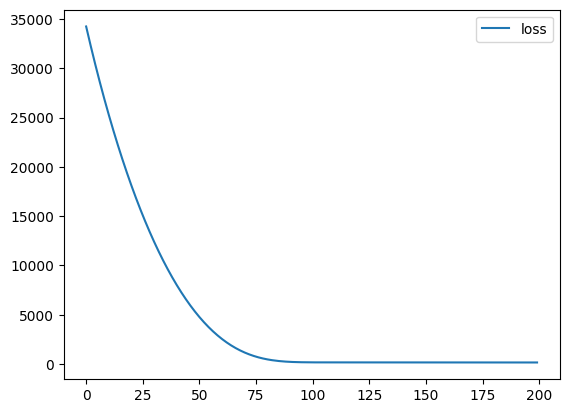

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.legend()

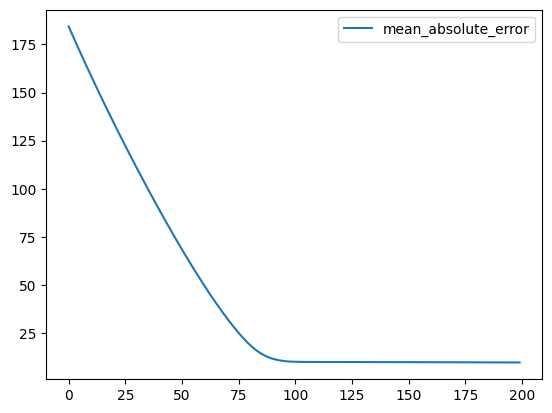

In [ ]:
plt.plot(r.history['mean_absolute_error'], label='mean_absolute_error')
plt.legend()

In [ ]:
model.predict([[16.0, 19.0]])

1/1 [==============================] - 0s 42ms/step


array([[244.10979]], dtype=float32)